In [ ]:

#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## 13 ADVANCED CLASSIFICATION DAY1 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs



In [1]:
#=================================================-
#### Slide 2: Directory settings  ####

# Set `main_dir` to the location of your `af-werx` folder (for Linux).
main_dir = "/home/Datasociety/Desktop/af-werx"
# Set `main_dir` to the location of your `af-werx` folder (for Mac).
main_dir = '/Users/Datasociety/Desktop/af-werx'
# Set `main_dir` to the location of your `af-werx` folder (for Windows).
#main_dir = "C:\\Users\\Datasociety\\Desktop\\af-werx"
# Make `data_dir` from the `main_dir` and
# remainder of the path to data directory.
data_dir = main_dir + "/data"



In [ ]:
# Set `main_dir` to the location of your `af-werx` folder (for Mac).
main_dir = '/Users/Datasociety/Desktop/af-werx'
data_dir = main_dir + "/data"

In [2]:
#=================================================-
#### Slide 3: Loading packages  ####

import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from textwrap import wrap
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score

# New today - random forest and boosting packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib.legend_handler import HandlerLine2D

In [3]:
# <<on my machine>>
# I would like to use relative paths but the class has been using absoulute paths so lets not change too much now
#data_dir = '/Users/user/Dropbox/Teaching_folders/_Current teaching/data_society_data_science/data'
# <<on my machine>>
# I would like to use relative paths but the class has been using absoulute paths so lets not change too much now
#plot_dir = '/Users/user/Dropbox/Teaching_folders/_Current teaching/data_society_data_science/plots'

os.chdir(data_dir)
os.getcwd()

'/Users/datasociety/Desktop/af-werx/data'

In [4]:
#=================================================-
#### Slide 4: Working directory  ####

# Set working directory.
os.chdir(data_dir)
# Check working directory.
print(os.getcwd())

/Users/datasociety/Desktop/af-werx/data


In [7]:
#=================================================-
#### Slide 27: Load the cleaned dataset  ####

os.chdir(data_dir)
costa_clean = pickle.load(open("costa_no_hc.sav","rb"))
costa_clean.head()


#– RemovehouseholdIDandindividualID 
#– Removevariableswithover50%NAs
#– Transformtargetvariabletobinary
#– Removehighlycorrelatedvariables


,rooms,tablet,males_under_12,males_over_12,females_under_12,females_over_12,years_of_schooling,wall_block_brick,wall_socket,wall_prefab_cement,...,num_mobilephones,region_central,region_Chorotega,region_pacifico,region_brunca,region_antlantica,region_huetar,urban_zone,age,Target
0,3,0,0,1,0,0,10,1,0,0,...,1,1,0,0,0,0,0,1,43,True
1,4,1,0,1,0,0,12,0,0,0,...,1,1,0,0,0,0,0,1,67,True
2,8,0,0,0,0,1,11,0,0,0,...,0,1,0,0,0,0,0,1,92,True
3,5,1,0,2,1,1,9,1,0,0,...,3,1,0,0,0,0,0,1,17,True
4,5,1,0,2,1,1,11,1,0,0,...,3,1,0,0,0,0,0,1,37,True


In [8]:
#=================================================-
#### Slide 28: Print info on data  ####

costa_clean.columns



Index(['rooms', 'tablet', 'males_under_12', 'males_over_12',
       'females_under_12', 'females_over_12', 'years_of_schooling',
       'wall_block_brick', 'wall_socket', 'wall_prefab_cement', 'wall_wood',
       'floor_mos_cer_terr', 'floor_wood', 'ceiling', 'electric_public',
       'toilet_sewer', 'cookenergy_elec', 'trash_truck', 'wall_bad',
       'wall_reg', 'roof_bad', 'roof_reg', 'floor_bad', 'floor_reg',
       'disabled_ppl', 'male', 'under10', 'free', 'married', 'separated',
       'single', 'hh_head', 'hh_spouse', 'hh_child', 'num_65plus',
       'dependency_rate', 'male_hh_head_educ', 'female_hh_head_educ',
       'meaneduc', 'educ_primary_inc', 'educ_primary', 'educ_secondary_inc',
       'educ_secondary', 'educ_undergrad', 'ppl_per_room', 'house_owned_full',
       'house_owned_paying', 'house_rented', 'house_other', 'computer',
       'television', 'num_mobilephones', 'region_central', 'region_Chorotega',
       'region_pacifico', 'region_brunca', 'region_antlantica',
 

In [9]:
#=================================================-
#### Slide 29: Split into training and test sets  ####

# Select the predictors and target.
X = costa_clean.drop(['Target'], axis = 1)
y = np.array(costa_clean['Target'])

# Set the seed to 1.
np.random.seed(1)

# Split into the training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)



In [10]:
#=================================================-
#### Slide 31: Building our model  ####

forest = RandomForestClassifier(criterion = 'gini', n_estimators = 100,
random_state = 1)



In [11]:
#=================================================-
#### Slide 32: Fitting our model  ####

# Fit the saved model to your training data.
forest.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [12]:
#=================================================-
#### Slide 33: Predicting with our data  ####

# Predict on test data.
y_predict_forest = forest.predict(X_test)

# Look at the first few predictions.
print(y_predict_forest[0:5,])



[ True  True  True  True  True]


In [13]:
#=================================================-
#### Slide 34: Confusion matrix and accuracy  ####

# Take a look at test data confusion matrix.
conf_matrix_forest = metrics.confusion_matrix(y_test, y_predict_forest)
print(conf_matrix_forest)
accuracy_forest = metrics.accuracy_score(y_test, y_predict_forest)
print("Accuracy for random forest on test data: ", accuracy_forest)



[[ 932  130]
 [  50 1756]]
Accuracy for random forest on test data:  0.9372384937238494


In [14]:
#=================================================-
#### Slide 35: Accuracy of the training dataset  ####

# Compute accuracy using training data.
acc_train_forest = forest.score(X_train, y_train)

print ("Train Accuracy:", acc_train_forest)



Train Accuracy: 1.0


In [16]:
#=================================================-
#### Slide 36: Save final accuracy  ####

model_final_forest_gbm = pickle.load(open("model_final_tree_all.sav","rb"))

In [17]:
#=================================================-
#### Slide 37: Save final accuracy  ####

# Add the model to our dataframe.
model_final_forest_gbm = model_final_forest_gbm.append({'metrics' : "accuracy" ,
'values' : round(accuracy_forest,4),
'model':'random forest' } ,
ignore_index = True)
print(model_final_forest_gbm)

    metrics  values                   model
0  accuracy  0.6046                   knn_5
1  accuracy  0.6188        knn_GridSearchCV
2  accuracy  0.6287                  knn_29
3  accuracy  0.6287                  knn_29
4  accuracy  0.6356                logistic
5  accuracy  0.7845  logistic_whole_dataset
6  accuracy  0.7859          logistic_tuned
7  accuracy  0.6611      tree_simple_subset
8  accuracy  0.9407      tree_all_variables
9  accuracy  0.9372           random forest


Text(0.5, 0, 'Relative Importance')

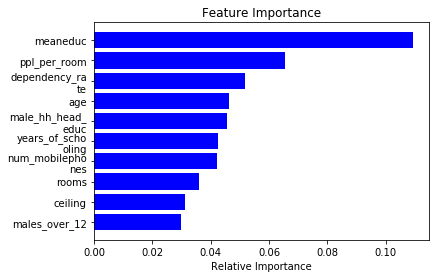

In [18]:
#=================================================-
#### Slide 40: Subsetting our features  ####

costarica_features = costa_clean.drop('Target', axis = 1)
features = costarica_features.columns
importances = forest.feature_importances_
indices = np. argsort(importances)[::-1]
top_indices = indices[0:10][::-1]

plt.figure(1)
plt.title('Feature Importance')
plt.barh(range(len(top_indices)), importances[top_indices], color = 'b', align = 'center')
labels = features[top_indices]
labels = [ '\n'.join(wrap(l,13)) for l in labels ]
plt.yticks(range(len(top_indices)), labels)
plt.xlabel('Relative Importance')



In [20]:
#=================================================-
#### Slide 42: Save the random forest model  ####

pickle.dump(forest, open("model_forest.sav","wb" ))

In [ ]:
#=================================================-
#### Slide 44: Exercise 1  ####





In [21]:
#=================================================-
#### Slide 56: Boosting: build model  ####

# Save the parameters we will be using for our gradient boosting classifier.
gbm = GradientBoostingClassifier(n_estimators = 200,
                                 learning_rate = 1,
                                 max_depth = 2,
                                 random_state = 1)



In [22]:
#=================================================-
#### Slide 57: Boosting: fit model  ####

# Fit the saved model to your training data.
gbm.fit(X_train, y_train)



GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=1,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [23]:
#=================================================-
#### Slide 58: Boosting: predict  ####

# Predict on test data.
predicted_values_gbm = gbm.predict(X_test)
print(predicted_values_gbm)



[ True  True  True ...  True False False]


In [24]:
#=================================================-
#### Slide 59: Confusion matrix and accuracy  ####

# Take a look at test data confusion matrix.
conf_matrix_boosting = metrics.confusion_matrix(y_test, predicted_values_gbm)
print(conf_matrix_boosting)
# Compute test model accuracy score.
accuracy_gbm = metrics.accuracy_score(y_test, predicted_values_gbm)
print('Accuracy of gbm on test data: ', accuracy_gbm)



[[ 833  229]
 [ 160 1646]]
Accuracy of gbm on test data:  0.8643654114365411


In [25]:
#=================================================-
#### Slide 60: Accuracy of training model  ####

# Compute accuracy using training data.
train_accuracy_gbm = gbm.score(X_train, y_train)

print ("Train Accuracy:", train_accuracy_gbm)



Train Accuracy: 0.902975033637315


In [26]:
#=================================================-
#### Slide 61: Pickle final accuracy  ####

# Add the model to our dataframe.
model_final_forest_gbm = model_final_forest_gbm.append({'metrics' : "accuracy" ,
'values' : round(accuracy_gbm,4),
'model': 'boosting' } ,
ignore_index = True)
print(model_final_forest_gbm)
pickle.dump(model_final_forest_gbm, open("model_final_forest_gbm.sav", "wb" ))



     metrics  values                   model
0   accuracy  0.6046                   knn_5
1   accuracy  0.6188        knn_GridSearchCV
2   accuracy  0.6287                  knn_29
3   accuracy  0.6287                  knn_29
4   accuracy  0.6356                logistic
5   accuracy  0.7845  logistic_whole_dataset
6   accuracy  0.7859          logistic_tuned
7   accuracy  0.6611      tree_simple_subset
8   accuracy  0.9407      tree_all_variables
9   accuracy  0.9372           random forest
10  accuracy  0.8644                boosting


Text(0.5, 0, 'Relative Importance')

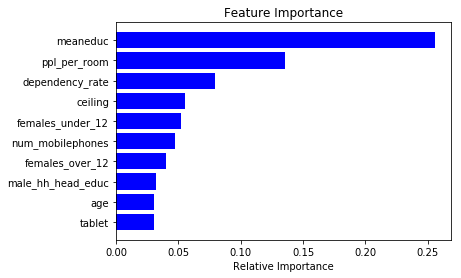

In [27]:
#=================================================-
#### Slide 62: Our top 10 features  ####

features = costarica_features.columns
importances = gbm.feature_importances_
indices = np. argsort(importances)[::-1]
top_indices = indices[0:10][::-1]

plt.figure(1)
plt.title('Feature Importance')
plt.barh(range(len(top_indices)), importances[top_indices], color = 'b', align = 'center')
labels = features[top_indices]
labels = [ '\n'.join(wrap(l,13)) for l in labels ]
plt.yticks(range(len(top_indices)), features[top_indices])
plt.xlabel('Relative Importance')

